In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
df = pd.read_csv('data/WL/R13296602_SL140.csv')

In [3]:
df.shape

(31, 88)

In [4]:
df.head

<bound method NDFrame.head of       Geo_FIPS           Geo_GEOID              Geo_NAME  \
0   6037195710  14000US06037195710  Census Tract 1957.10   
1   6037195802  14000US06037195802  Census Tract 1958.02   
2   6037195903  14000US06037195903  Census Tract 1959.03   
3   6037208301  14000US06037208301  Census Tract 2083.01   
4   6037208302  14000US06037208302  Census Tract 2083.02   
5   6037208401  14000US06037208401  Census Tract 2084.01   
6   6037208402  14000US06037208402  Census Tract 2084.02   
7   6037208501  14000US06037208501  Census Tract 2085.01   
8   6037208502  14000US06037208502  Census Tract 2085.02   
9   6037208610  14000US06037208610  Census Tract 2086.10   
10  6037208620  14000US06037208620  Census Tract 2086.20   
11  6037208710  14000US06037208710  Census Tract 2087.10   
12  6037208720  14000US06037208720  Census Tract 2087.20   
13  6037208801  14000US06037208801  Census Tract 2088.01   
14  6037208802  14000US06037208802  Census Tract 2088.02   
15  603720

In [5]:
df.sample()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,PCT_SE_A14001_008,PCT_SE_A14001_009,PCT_SE_A14001_010,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017
16,6037208903,14000US06037208903,Census Tract 2089.03,"Census Tract 2089.03, Los Angeles County, Cali...",ca,140,0,ACSSF,4432,NaN,...,4.55,5.5,5.76,4.98,8.59,14.78,1.29,2.58,0.95,0.0


In [6]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 88 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           31 non-null     int64  
 1   Geo_GEOID          31 non-null     object 
 2   Geo_NAME           31 non-null     object 
 3   Geo_QName          31 non-null     object 
 4   Geo_STUSAB         31 non-null     object 
 5   Geo_SUMLEV         31 non-null     int64  
 6   Geo_GEOCOMP        31 non-null     int64  
 7   Geo_FILEID         31 non-null     object 
 8   Geo_LOGRECNO       31 non-null     int64  
 9   Geo_US             0 non-null      float64
 10  Geo_REGION         0 non-null      float64
 11  Geo_DIVISION       0 non-null      float64
 12  Geo_STATECE        0 non-null      float64
 13  Geo_STATE          31 non-null     int64  
 14  Geo_COUNTY         31 non-null     int64  
 15  Geo_COUSUB         0 non-null      float64
 16  Geo_PLACE          0 non-nul

In [7]:
df.Geo_FIPS.head()

0    6037195710
1    6037195802
2    6037195903
3    6037208301
4    6037208302
Name: Geo_FIPS, dtype: int64

In [8]:
# Have to conver the FIPS code into strings
df = pd.read_csv(
    'data/WL/R13296602_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [9]:
df.Geo_FIPS.head()

0    06037195710
1    06037195802
2    06037195903
3    06037208301
4    06037208302
Name: Geo_FIPS, dtype: object

In [10]:
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_PLACESE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PUMA5',
 'Geo_PUMA1']

In [11]:
df=df.dropna(axis=1,how="all")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           31 non-null     object 
 1   Geo_GEOID          31 non-null     object 
 2   Geo_NAME           31 non-null     object 
 3   Geo_QName          31 non-null     object 
 4   Geo_STUSAB         31 non-null     object 
 5   Geo_SUMLEV         31 non-null     int64  
 6   Geo_GEOCOMP        31 non-null     int64  
 7   Geo_FILEID         31 non-null     object 
 8   Geo_LOGRECNO       31 non-null     int64  
 9   Geo_STATE          31 non-null     object 
 10  Geo_COUNTY         31 non-null     object 
 11  Geo_TRACT          31 non-null     int64  
 12  SE_A14001_001      31 non-null     int64  
 13  SE_A14001_002      31 non-null     int64  
 14  SE_A14001_003      31 non-null     int64  
 15  SE_A14001_004      31 non-null     int64  
 16  SE_A14001_005      31 non-nu

In [13]:
df.columns 

Index(['Geo_FIPS', 'Geo_GEOID', 'Geo_NAME', 'Geo_QName', 'Geo_STUSAB',
       'Geo_SUMLEV', 'Geo_GEOCOMP', 'Geo_FILEID', 'Geo_LOGRECNO', 'Geo_STATE',
       'Geo_COUNTY', 'Geo_TRACT', 'SE_A14001_001', 'SE_A14001_002',
       'SE_A14001_003', 'SE_A14001_004', 'SE_A14001_005', 'SE_A14001_006',
       'SE_A14001_007', 'SE_A14001_008', 'SE_A14001_009', 'SE_A14001_010',
       'SE_A14001_011', 'SE_A14001_012', 'SE_A14001_013', 'SE_A14001_014',
       'SE_A14001_015', 'SE_A14001_016', 'SE_A14001_017', 'PCT_SE_A14001_002',
       'PCT_SE_A14001_003', 'PCT_SE_A14001_004', 'PCT_SE_A14001_005',
       'PCT_SE_A14001_006', 'PCT_SE_A14001_007', 'PCT_SE_A14001_008',
       'PCT_SE_A14001_009', 'PCT_SE_A14001_010', 'PCT_SE_A14001_011',
       'PCT_SE_A14001_012', 'PCT_SE_A14001_013', 'PCT_SE_A14001_014',
       'PCT_SE_A14001_015', 'PCT_SE_A14001_016', 'PCT_SE_A14001_017'],
      dtype='object')

In [14]:
# Define columns to keep
columns_to_keep = ['Geo_FIPS',
                   'SE_A14001_002',
                   'SE_A14001_003',
                   'SE_A14001_004',
                   'SE_A14001_005',
                   'SE_A14001_006',
                   'SE_A14001_007',
                   'SE_A14001_008',
                   'SE_A14001_009',
                   'SE_A14001_010',
                   'SE_A14001_011',
                   'SE_A14001_012',
                   'SE_A14001_013',
                   'SE_A14001_014',
                   'SE_A14001_015',
                   'SE_A14001_016',
                   'SE_A14001_017',
                  ]

In [15]:
df2 = df[columns_to_keep]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Geo_FIPS       31 non-null     object
 1   SE_A14001_002  31 non-null     int64 
 2   SE_A14001_003  31 non-null     int64 
 3   SE_A14001_004  31 non-null     int64 
 4   SE_A14001_005  31 non-null     int64 
 5   SE_A14001_006  31 non-null     int64 
 6   SE_A14001_007  31 non-null     int64 
 7   SE_A14001_008  31 non-null     int64 
 8   SE_A14001_009  31 non-null     int64 
 9   SE_A14001_010  31 non-null     int64 
 10  SE_A14001_011  31 non-null     int64 
 11  SE_A14001_012  31 non-null     int64 
 12  SE_A14001_013  31 non-null     int64 
 13  SE_A14001_014  31 non-null     int64 
 14  SE_A14001_015  31 non-null     int64 
 15  SE_A14001_016  31 non-null     int64 
 16  SE_A14001_017  31 non-null     int64 
dtypes: int64(16), object(1)
memory usage: 4.2+ KB


In [16]:
# Rename the columns 
columns = list(df2)
columns

['Geo_FIPS',
 'SE_A14001_002',
 'SE_A14001_003',
 'SE_A14001_004',
 'SE_A14001_005',
 'SE_A14001_006',
 'SE_A14001_007',
 'SE_A14001_008',
 'SE_A14001_009',
 'SE_A14001_010',
 'SE_A14001_011',
 'SE_A14001_012',
 'SE_A14001_013',
 'SE_A14001_014',
 'SE_A14001_015',
 'SE_A14001_016',
 'SE_A14001_017']

In [17]:
df2.columns = ['FIPS',               
'Less than $10,000',
'$10,000-$14,999',
'$15,000-$19,999',
'$20,000-$24,999',
'$25,000-$29,999',
'$30,000-$34,999',
'$35,000-$39,999',
'$40,000-$44,999',
'$45,000-$49,999',
'$50,000-$59,999',
'$60,000-$74,999',
'$75,000-$99,999',
'$100,000-$124,999',
'$125,000-$149,999',
'$150,000-$199,999',
'More than $200,000']

In [18]:
# Making sure the data works 
df2.head(10)

,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000"
0,06037195710,121,60,71,161,56,72,36,103,28,83,176,91,144,49,58,58
1,06037195802,43,46,45,80,31,51,62,63,26,57,69,119,80,50,55,61
2,06037195903,65,12,43,43,32,74,63,45,56,53,84,150,96,30,29,36
3,06037208301,75,45,37,22,44,12,14,0,28,57,121,34,30,11,22,4
4,06037208302,130,252,88,122,67,97,83,102,47,148,160,158,120,0,66,21
5,06037208401,62,226,169,155,107,121,51,76,73,175,50,53,103,68,0,26
6,06037208402,42,39,65,52,17,60,79,55,59,45,91,96,31,19,32,45
7,06037208501,25,34,90,28,46,30,36,45,24,69,124,103,76,20,18,46
8,06037208502,97,94,76,138,63,71,60,183,18,151,82,160,90,12,18,12
9,06037208610,111,89,50,106,45,109,75,69,63,146,171,205,120,41,23,47


In [19]:
# Doing some stats 
df2.mean()

FIPS                         inf
Less than $10,000     108.064516
$10,000-$14,999       126.967742
$15,000-$19,999        99.967742
$20,000-$24,999        91.451613
$25,000-$29,999        80.838710
$30,000-$34,999        93.774194
$35,000-$39,999        71.064516
$40,000-$44,999        67.645161
$45,000-$49,999        56.193548
$50,000-$59,999       101.709677
$60,000-$74,999       109.741935
$75,000-$99,999       115.967742
$100,000-$124,999      65.774194
$125,000-$149,999      28.903226
$150,000-$199,999      24.096774
More than $200,000     18.419355
dtype: float64

In [20]:
# access a single column like df['col_name']
df2.head()

,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000"
0,06037195710,121,60,71,161,56,72,36,103,28,83,176,91,144,49,58,58
1,06037195802,43,46,45,80,31,51,62,63,26,57,69,119,80,50,55,61
2,06037195903,65,12,43,43,32,74,63,45,56,53,84,150,96,30,29,36
3,06037208301,75,45,37,22,44,12,14,0,28,57,121,34,30,11,22,4
4,06037208302,130,252,88,122,67,97,83,102,47,148,160,158,120,0,66,21


In [21]:
df2['Less than $10,000'].mean()

108.06451612903226

In [22]:
df2.median()

FIPS                  6.037209e+09
Less than $10,000     1.110000e+02
$10,000-$14,999       1.020000e+02
$15,000-$19,999       1.030000e+02
$20,000-$24,999       8.600000e+01
$25,000-$29,999       7.800000e+01
$30,000-$34,999       8.300000e+01
$35,000-$39,999       6.700000e+01
$40,000-$44,999       6.800000e+01
$45,000-$49,999       6.200000e+01
$50,000-$59,999       8.300000e+01
$60,000-$74,999       9.200000e+01
$75,000-$99,999       1.030000e+02
$100,000-$124,999     5.200000e+01
$125,000-$149,999     2.900000e+01
$150,000-$199,999     2.100000e+01
More than $200,000    8.000000e+00
dtype: float64

In [23]:
df2.describe()

,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000"
count,31.000000,31.000000,31.000000,31.000000,31.00000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,108.064516,126.967742,99.967742,91.451613,80.83871,93.774194,71.064516,67.645161,56.193548,101.709677,109.741935,115.967742,65.774194,28.903226,24.096774,18.419355
std,57.098707,81.633932,47.434505,42.302749,43.39439,41.383338,30.240079,35.670294,25.803642,59.739542,53.907926,71.810159,53.288967,20.092046,21.805741,21.608292
min,25.000000,12.000000,12.000000,22.000000,17.00000,12.000000,14.000000,0.000000,9.000000,19.000000,23.000000,10.000000,9.000000,0.000000,0.000000,0.000000
25%,56.500000,60.500000,64.000000,59.000000,45.50000,70.500000,52.000000,47.000000,31.500000,57.500000,68.500000,65.000000,29.000000,11.500000,10.500000,0.000000
50%,111.000000,102.000000,103.000000,86.000000,78.00000,83.000000,67.000000,68.000000,62.000000,83.000000,92.000000,103.000000,52.000000,29.000000,21.000000,8.000000
75%,157.500000,178.000000,132.500000,120.000000,107.00000,120.000000,85.000000,73.500000,74.000000,142.500000,157.500000,154.000000,93.000000,45.500000,30.500000,33.000000
max,198.000000,314.000000,202.000000,196.000000,197.00000,194.000000,144.000000,183.000000,107.000000,298.000000,216.000000,392.000000,253.000000,68.000000,93.000000,69.000000


<AxesSubplot: title={'center': 'West Lake'}>

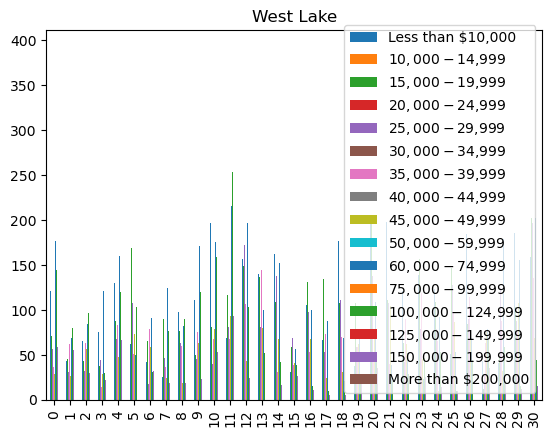

In [24]:
df2.plot.bar(title = "West Lake")

In [25]:
# Want to create a total households population
df3 = ['Less than $10,000',
'$10,000-$14,999',
'$15,000-$19,999',
'$20,000-$24,999',
'$25,000-$29,999',
'$30,000-$34,999',
'$35,000-$39,999',
'$40,000-$44,999',
'$45,000-$49,999',
'$50,000-$59,999',
'$60,000-$74,999',
'$75,000-$99,999',
'$100,000-$124,999',
'$125,000-$149,999',
'$150,000-$199,999',
'More than $200,000']

In [26]:
df2['TotalPop'] = df2[df3].sum(axis = 1)
df2.head(3)

/tmp/ipykernel_693/337586398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TotalPop'] = df2[df3].sum(axis = 1)


,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000",TotalPop
0,06037195710,121,60,71,161,56,72,36,103,28,83,176,91,144,49,58,58,1367
1,06037195802,43,46,45,80,31,51,62,63,26,57,69,119,80,50,55,61,938
2,06037195903,65,12,43,43,32,74,63,45,56,53,84,150,96,30,29,36,911


In [27]:
# Notice that the SE_A14001_001 is household number of resondents by census tract
df3 = pd.read_csv("data/WL/R13296602_SL140.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df3.head(5)

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_PLACESE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITSCE,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_UACP,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_VTD,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_BTTR,Geo_BTBG,Geo_PUMA5,Geo_PUMA1,SE_A14001_001,SE_A14001_002,SE_A14001_003,SE_A14001_004,SE_A14001_005,SE_A14001_006,SE_A14001_007,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017,PCT_SE_A14001_002,PCT_SE_A14001_003,PCT_SE_A14001_004,PCT_SE_A14001_005,PCT_SE_A14001_006,PCT_SE_A14001_007,PCT_SE_A14001_008,PCT_SE_A14001_009,PCT_SE_A14001_010,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017
0,6037195710,14000US06037195710,Census Tract 1957.10,"Census Tract 1957.10, Los Angeles County, Cali...",ca,140,0,ACSSF,4340,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,195710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1367,121,60,71,161,56,72,36,103,28,83,176,91,144,49,58,58,8.85,4.39,5.19,11.78,4.10,5.27,2.63,7.53,2.05,6.07,12.87,6.66,10.53,3.58,4.24,4.24
1,6037195802,14000US06037195802,Census Tract 1958.02,"Census Tract 1958.02, Los Angeles County, Cali...",ca,140,0,ACSSF,4342,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,195802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,938,43,46,45,80,31,51,62,63,26,57,69,119,80,50,55,61,4.58,4.90,4.80,8.53,3.30,5.44,6.61,6.72,2.77,6.08,7.36,12.69,8.53,5.33,5.86,6.50
2,6037195903,14000US06037195903,Census Tract 1959.03,"Census Tract 1959.03, Los Angeles County, Cali...",ca,140,0,ACSSF,4347,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,195903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,911,65,12,43,43,32,74,63,45,56,53,84,150,96,30,29,36,7.14,1.32,4.72,4.72,3.51,8.12,6.92,4.94,6.15,5.82,9.22,16.47,10.54,3.29,3.18,3.95
3,6037208301,14000US06037208301,Census Tract 2083.01,"Census Tract 2083.01, Los Angeles County, Cali...",ca,140,0,ACSSF,4419,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,208301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,556,75,45,37,22,44,12,14,0,28,57,121,34,30,11,22,4,13.49,8.09,6.65,3.96,7.91,2.16,2.52,0.00,5.04,10.25,21.76,6.12,5.40,1.98,3.96,0.72
4,6037208302,14000US06037208302,Census Tract 2083.02,"Census Tract 2083.02, Los Angeles County, Cali...",ca,140,0,ACSSF,4420,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,208302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1661,130,252,88,122,67,97,83,102,47,148,160,158,120,0,66,21,7.83,15.17,5.30,7.34,4.03,5.84,5.00,6.14,2.83,8.91,9.63,9.51,7.22,0.00,3.97,1.26


In [28]:
df_householdsize = df3['SE_A14001_001']
df_householdsize.sample(10)

30    1696
8     1325
16    1164
18    1104
20    1992
4     1661
3      556
28    1191
5     1515
7      814
Name: SE_A14001_001, dtype: int64

In [29]:
df_householdsize.describe()

count      31.000000
mean     1260.580645
std       365.976572
min       556.000000
25%       938.500000
50%      1291.000000
75%      1492.500000
max      2043.000000
Name: SE_A14001_001, dtype: float64

In [30]:
# Creating a poverty column variable 
df2['poverty'] = df2['Less than $10,000'] + df2['$10,000-$14,999'] + df2['$15,000-$19,999'] + df2['$20,000-$24,999'] 
df2.sample(5)

/tmp/ipykernel_693/3305094393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['poverty'] = df2['Less than $10,000'] + df2['$10,000-$14,999'] + df2['$15,000-$19,999'] + df2['$20,000-$24,999']


,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000",TotalPop,poverty
28,06037212202,41,102,46,130,124,80,87,71,32,96,179,75,59,48,21,0,1191,319
30,06037213401,159,53,202,82,197,194,135,71,69,86,202,128,44,59,15,0,1696,496
6,06037208402,42,39,65,52,17,60,79,55,59,45,91,96,31,19,32,45,827,198
11,06037208710,69,97,116,48,81,69,67,20,93,298,216,392,253,62,93,69,2043,330
0,06037195710,121,60,71,161,56,72,36,103,28,83,176,91,144,49,58,58,1367,413


In [31]:
#Creating a poverty and total population to get a percent 
df2['p_poverty'] = df2['poverty']/df2['TotalPop']*100
df2.sample(10)

/tmp/ipykernel_693/3666134208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['p_poverty'] = df2['poverty']/df2['TotalPop']*100


,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000",TotalPop,poverty,p_poverty
18,06037209103,176,70,107,99,111,111,70,114,31,63,68,58,21,0,5,0,1104,452,40.942029
8,06037208502,97,94,76,138,63,71,60,183,18,151,82,160,90,12,18,12,1325,405,30.566038
23,06037209403,139,288,156,105,78,154,119,41,45,44,23,99,46,29,25,13,1404,688,49.002849
25,06037209520,51,61,147,42,128,83,98,68,86,53,53,34,10,10,10,5,939,301,32.055378
5,06037208401,62,226,169,155,107,121,51,76,73,175,50,53,103,68,0,26,1515,612,40.396040
22,06037209402,121,179,63,133,42,133,90,68,62,139,52,113,28,7,0,0,1230,496,40.325203
20,06037209300,195,260,202,196,138,174,51,112,68,184,109,167,52,41,35,8,1992,853,42.821285
12,06037208720,156,161,149,74,172,123,106,70,43,95,197,95,103,14,24,8,1590,540,33.962264
3,06037208301,75,45,37,22,44,12,14,0,28,57,121,34,30,11,22,4,556,179,32.194245
17,06037208904,66,314,134,118,53,72,73,107,24,81,88,147,9,0,5,0,1291,632,48.954299


<AxesSubplot: ylabel='Frequency'>

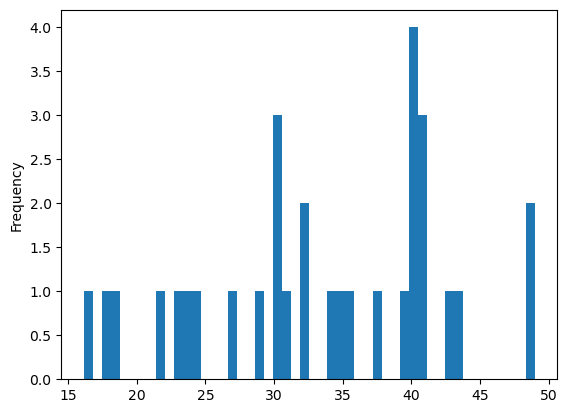

In [32]:
df2['p_poverty'].plot.hist(bins=50)

In [33]:
# top 10 census of households income that live in poverty. 
df_sorted = df2.sort_values(by='p_poverty',ascending = False)
df_sorted[['FIPS','p_poverty']].head(10)

,FIPS,p_poverty
23,06037209403,49.002849
17,06037208904,48.954299
19,06037209104,43.543223
20,06037209300,42.821285
18,06037209103,40.942029
24,06037209510,40.800000
21,06037209401,40.654500
5,06037208401,40.396040
22,06037209402,40.325203
13,06037208801,40.289414


<AxesSubplot: xlabel='FIPS'>

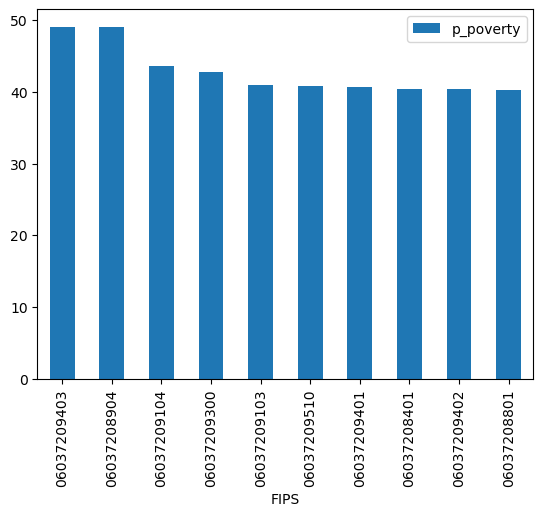

In [34]:
df_sorted.head(10).plot.bar(x='FIPS',
                            y='p_poverty')

<AxesSubplot: title={'center': 'Census Tract where West Lake has more poverty'}, ylabel='FIPS'>

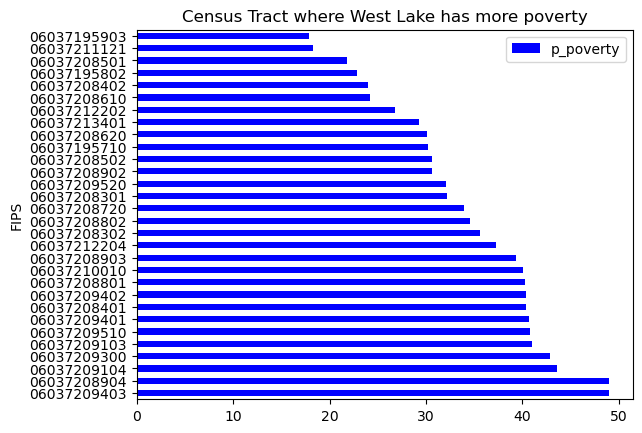

In [41]:
df_sorted.head(30).plot.barh(x='FIPS',  # barh turns the plot direction 
                            y='p_poverty', 
                            title='Census Tract where West Lake has more poverty',
                            color='blue')

In [36]:
# Import geojson file of LA County
tracts=gpd.read_file('data/WL/Census_Tracts_2020.geojson')
tracts.head(2)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."


In [37]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']

In [38]:
tracts=tracts.merge(df2, on="FIPS")

In [39]:
tracts.head(3)

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000",TotalPop,poverty,p_poverty
0,516,195710,1957.10,5.203273e+06,9761.838870,"POLYGON ((-118.26497 34.07740, -118.26513 34.0...",06037195710,121,60,71,161,56,72,36,103,28,83,176,91,144,49,58,58,1367,413,30.212143
1,518,195802,1958.02,4.332630e+06,9935.908865,"POLYGON ((-118.27683 34.07735, -118.27739 34.0...",06037195802,43,46,45,80,31,51,62,63,26,57,69,119,80,50,55,61,938,214,22.814499
2,523,195903,1959.03,2.562592e+06,6738.806174,"POLYGON ((-118.28248 34.08361, -118.28309 34.0...",06037195903,65,12,43,43,32,74,63,45,56,53,84,150,96,30,29,36,911,163,17.892426


<AxesSubplot: >

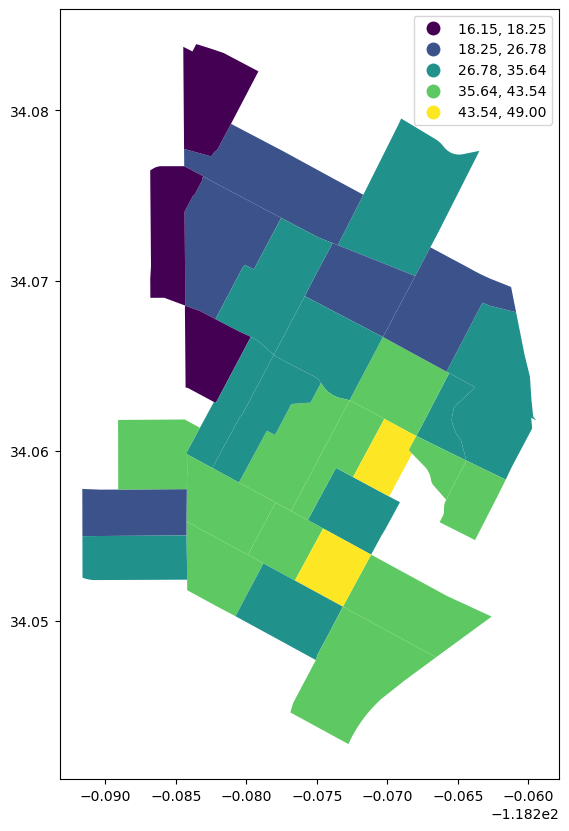

In [40]:
# scheme='NaturalBreaks'
tracts.plot(figsize=(12,10),
                 column='p_poverty',
                 legend=True, 
                 scheme='NaturalBreaks')